In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import concurrent.futures
plt.style.use('dark_background')
n = 4
N = 10000

import os

os.chdir('/home/vv/Documents/IsingModelPractice1')


In [2]:
dataset = pd.read_csv("Data/Energy w 30000 rand_flat 4 x 4.csv")

energies = dataset['energies']
examples = dataset.iloc[:,1:n*n]

In [3]:
N = int(dataset.shape[0])
n = int(np.sqrt(dataset.shape[1]-1))
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [11]:
def RFR_etimators(hypPar):
    num_of_trees = hypPar
    #training_size = num_of_trees_training_size[1]
    #testing_size = N - training_size
    X_train, X_test, y_train, y_test = train_test_split(examples, energies,train_size=0.8, test_size=0.2)
    model = RandomForestClassifier(n_estimators=num_of_trees)
    model.fit(X_train, y_train)
    
    
    
    return [num_of_trees, list(y_test), list(model.predict(X_test))]

In [12]:
args = list(np.arange(50,500,100))
eval_data = [[],[],[]]

with concurrent.futures.ProcessPoolExecutor() as executor:
    results = executor.map(RFR_etimators, [500])
    
    for p1 in results:
        eval_data[0].append(p1[0]) # number of trees
        eval_data[1].append(p1[1]) # training size
        eval_data[2].append(p1[2]) # OBB score
              

In [13]:
print(eval_data[0])

[500]


In [15]:
error = [abs(i-j) for i in eval_data[1][0] for j in  eval_data[2][0]]

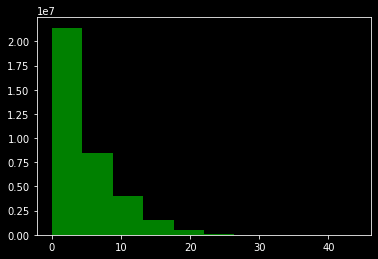

In [12]:
import matplotlib.pyplot as plt

# kwargs = dict(alpha=0.5, bins=18)

# plt.his(eval_data[0], error)



plt.hist(error, color='g')
# plt.hist(y_test, **kwargs, color='b', label='Fair')
#plt.hist(to_read.iloc[4])
plt.show()

In [77]:
# 500 trees

import time
start_time = time.time()#time

X_train5, X_test5, y_train5, y_test5 = train_test_split(examples, energies,train_size=0.8, test_size=0.2)
model5 = RandomForestClassifier(n_estimators=500, oob_score = True)
model5.fit(X_train, y_train)


train_time = time.time() - start_time#time
print("--- %s seconds ---" % train_time)#time
train_time5 = round(train_time, 3)

--- 9.646872520446777 seconds ---


In [78]:
# 700 trees

import time
start_time = time.time() #time

X_train7, X_test7, y_train7, y_test7= train_test_split(examples, energies,train_size=0.8, test_size=0.2)
model7 = RandomForestClassifier(n_estimators=700, oob_score = True)
model7.fit(X_train, y_train)


train_time = time.time() - start_time #time
print("--- %s seconds ---" % train_time)#time
train_time7 = round(train_time, 3)

--- 13.754204273223877 seconds ---


In [79]:
# 500 trees

start_time = time.time() #time

y_new5 = model5.predict(X_test5)


predi_time = time.time() - start_time #time

print("--- %s seconds ---" % predi_time) #time
predi_time5 = round(predi_time, 3)


--- 0.768547773361206 seconds ---


In [80]:
# 700 trees

start_time = time.time() #time

y_new7 = model7.predict(X_test7)


predi_time = time.time() - start_time #time

print("--- %s seconds ---" % predi_time) # time
predi_time7 = round(predi_time, 3)


--- 1.0634231567382812 seconds ---


In [18]:
# error2 = []

# for i in y_test:
#     for j in  y_new:
#         error2.append(abs(i-j))



# print(error2[0:10])

[0, 4, 0, 4, 12, 4, 0, 8, 4, 0]


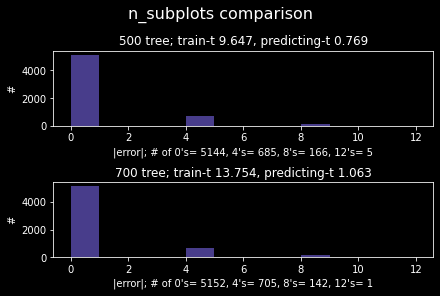

In [82]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, constrained_layout=True)

counts5, edges5, plot5 = axs[0].hist(abs(y_test5-y_new5), bins = 12, color='darkslateblue')
counts5=[int(i) for i in counts5]

axs[0].set_title(f"500 tree; train-t {train_time5}, predicting-t {predi_time5}")
axs[0].set_xlabel(f'|error|; # of 0\'s= {counts5[0]}, 4\'s= {counts5[4]}, 8\'s= {counts5[8]}, 12\'s= {counts5[11]}')
axs[0].set_ylabel('#')
fig.suptitle('n_subplots comparison', fontsize=16)


counts7, edges7, plot7 = axs[1].hist(abs(y_test7-y_new7), bins = 12, color='darkslateblue')
counts7=[int(i) for i in counts7]

axs[1].set_xlabel(f'|error|; # of 0\'s= {counts7[0]}, 4\'s= {counts7[4]}, 8\'s= {counts7[8]}, 12\'s= {counts7[11]}')
axs[1].set_title(f"700 tree; train-t {train_time7}, predicting-t {predi_time7}")
axs[1].set_ylabel('#')
plt.show()



In [ ]:
len(error2)

In [19]:
plt.show()